# Problem 1 (Practice)

Let us take a sample data of fish length $L$ and weight $W$ and test the functional relationship between the two.

(a) Load the 'fish.txt' file as two variables $L$ (first column) and $W$ (second column) and plot $W$ vs. $L$ as a scatter plot. (10 pts)


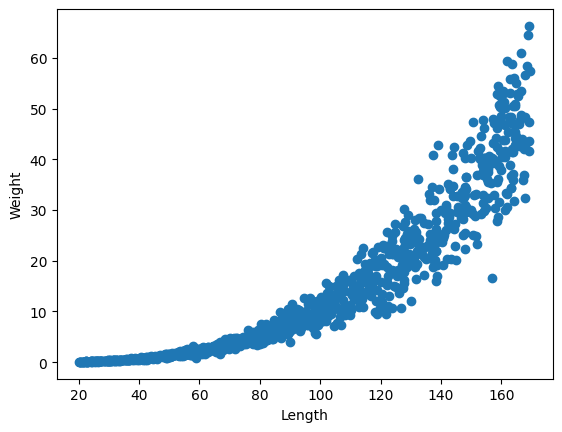

In [18]:
'''
Import the necessary libraries and load the data file via unpacking.
Plot the scatter of W and L
'''
import numpy as np
import matplotlib.pyplot as plt

L, W = np.loadtxt('fish.txt', unpack=True)
plt.scatter(L, W)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

(b) From the data, we can guess that $L$ and $W$ have the functional relationship $W=AL^b$, where $A$ and $b$ are parameters that need to be fitted. Show that this functional form can be transformed into another function form:
\begin{align*}
  y = f(x) = a + bx.
\end{align*}
(10 pts)

Take the log on the both side

$$W = AL^b$$
$$\ln(W) = \ln(AL^b)$$
$$\ln(W) = \ln(A) + \ln(L^b)$$
$$\ln(W) = \ln(A) + b \ln(L)$$

Let $y = \ln(W)$ \, $x = \ln(L)$ \, $a = \ln(A)$

Thus, the function $W = AL^b$ can be transformed into $y = f(x) = a + bx$.

(c) Find the expression for the optimal $a$ and $b$ by solving $\frac{\partial E}{\partial a}|_{a^*,b^*}=0$ and $\frac{\partial E}{\partial b}|_{a^*,b^*}=0$ where $E$ is the sum of squared errors. (40 pts)

The error function $E$ on the dataset $\{x_n, y_n\}$ is defined as
$$E(a, b) = \sum_{n=1}^{N} [y_n - f(x_n)]^2 = \sum_{n=1}^{N} [y_n - (a + bx_n)]^2$$

Take the partial derivative of E w.r.t. $a$ and $b$, we will apply $\frac{\partial E}{\partial a}|_{a^*,b^*} = 0$ and $\frac{\partial E}{\partial b}|_{a^*,b^*} = 0 $

First,
$$\frac{\partial E}{\partial a}|_{a^*,b^*} = -2 \sum_{n=1}^{N} (y_n - a^* - b^*x_n) = 0$$
$$\sum_{n=1}^{N} y_n - \sum_{n=1}^{N} a^* - \sum_{n=1}^{N} b^*x_n = 0$$
$$\sum_{n=1}^{N} y_n - N a^* - b^* \sum_{n=1}^{N} x_n = 0$$
$$N a^* + b^* \sum_{n=1}^{N} x_n = \sum_{n=1}^{N} y_n$$

Next,
$$\frac{\partial E}{\partial b}|_{a^*,b^*} = -2 \sum_{n=1}^{N} (y_n x_n - a^* x_n - b^* x_n^2) = 0$$
$$\sum_{n=1}^{N} y_n x_n - a^* \sum_{n=1}^{N} x_n - b^* \sum_{n=1}^{N} x_n^2 = 0$$
$$a^* \sum_{n=1}^{N} x_n + b^* \sum_{n=1}^{N} x_n^2 = \sum_{n=1}^{N} y_n x_n$$

Let $S_x = \sum x_n$, $S_y = \sum y_n$, $S_{xx} = \sum x_n^2$, and $S_{xy} = \sum x_n y_n$ then we have

(1) $N a^* + S_x b^* = S_y$

(2) $S_x a^* + S_{xx} b^* = S_{xy}$

Isolate the $a^*$ and $b^*$:

$$a^* = \frac{S_y - S_x b^*}{N}$$
$$S_x \left( \frac{S_y - S_x b^*}{N} \right) + S_{xx} b^* = S_{xy}$$
$$S_x S_y - (S_x)^2 b^* + N S_{xx} b^* = N S_{xy}$$
$$b^* (N S_{xx} - (S_x)^2) = N S_{xy} - S_x S_y$$

This yields:
$$b^* = \frac{N S_{xy} - S_x S_y}{N S_{xx} - (S_x)^2}$$
$$a^* = \frac{S_y - S_x b^*}{N} = \frac{S_{xx}S_y - S_{xy}S_x}{NS_{xx} - (S_x)^2}$$


(d) Write a program to find $a^*$ and $b^*$ using the given data and print them out. Plot the data points as a scatter plot as $\ln W$ vs. $\ln L$ and overlay the fitted function on top. (30 pts)

a: -11.614786740916314, b: 3.0215854002369777


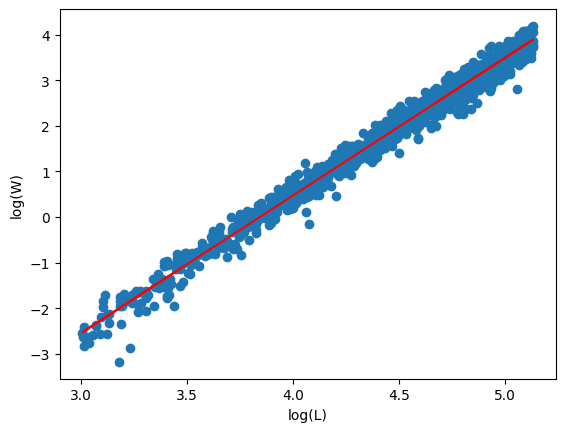

In [19]:
'''
Compute the a* and b* using Least square method above and plot the scatter of lnW vs. lwL and fitted function
'''

x = np.log(L)
y = np.log(W)
N = len(L)

Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x*x)
Sxy = np.sum(x*y)

b = (Sx*Sy - N*Sxy) / (Sx*Sx - N*Sxx)
a = (Sy - b*Sx) / N

print(f"a: {a}, b: {b}")
plt.scatter(x, y)
plt.plot(x, a + b*x, 'r-')
plt.xlabel('log(L)')
plt.ylabel('log(W)')
plt.show()

(e) Physically interpret the value of the obtained $b^*$. (10 pts)

The parameter $b^*$ shows the fish species in this dataset has isometric growth

The parameter $b^*$ is scaling exponent between the fish's length and weight. Refer [this](https://youtu.be/bXKEP9Fw4ck?si=A4Qk--373kI_It4u&t=234), we can assume fish has a constant density. Then its weight $W$ is directly proportional to the volume $V$ which is proportional to the cube of length $L$. So we have

$$W \propto V \quad \text{and} \quad V \propto L^{3} \;\implies\; W \propto L^{3}$$

In this ideal assumption, the exponent $b$ is exactly 3. 
- $b^* \approx 3$ : isometric growth
- $b^* > 3$ : positive allometric growth
- $b^* < 3$ : negative allometric growth

Since we obtained $b^* = 3.0215854002369777 \approx 3$, we can conclude the parameter $b^*$ shows the fish species in this dataset has isometric growth

---
# Problem 2

(a) We wish to repeat Problem 1(d) using the gradient descent method instead of the least squares method. What should be $\Delta a = -c \partial E/\partial a$ and $\Delta b= -c \partial E/ \partial b$ at each time step? (35 pts)

The partial derivative of $E$ w.r.t. $a$ and $b$ is

$$\frac{\partial E}{\partial a} = \frac{\partial}{\partial a} \sum_{n=1}^{N} [y_n - a - bx_n]^2 = -2 \sum_{n=1}^{N} (y_n - a - bx_n)$$
$$\frac{\partial E}{\partial b} = \frac{\partial}{\partial b} \sum_{n=1}^{N} [y_n - a - bx_n]^2 = -2 \sum_{n=1}^{N} x_n (y_n - a - bx_n)$$

For $\Delta a$ and $\Delta b$
$$\Delta a = -c \frac{\partial E}{\partial a} = -c \left[ -2 \sum_{n=1}^{N} (y_n - a - bx_n) \right] = 2c \sum_{n=1}^{N} (y_n - a - bx_n)$$
$$\Delta b = -c \frac{\partial E}{\partial b} = -c \left[ -2 \sum_{n=1}^{N} x_n (y_n - a - bx_n) \right] = 2c \sum_{n=1}^{N} x_n (y_n - a - bx_n)$$

At each iteration step $t$, the gradient descent algorithm with full batch $\{x_n,\, y_n\}_{n=1}^{N}$ can be calculated as $a^{(t+1)} = a^{(t)} + \Delta a$ and $b^{(t+1)} = b^{(t)} + \Delta b$

(b) Write a program to find the optimal parameters. Plot the data points as a scatter plot as $\ln W$ vs. $\ln L$ and overlay the fitted function on top. Keep track of the number of iterations, and the values of $a$ and $b$ at each iteration. Print out the number of iterations along with $a^*$ and $b^*$. Also plot $a$ and $b$ as a function of iteration number and confirm the convergence. Choose a step parameter $c=10^{-5}$, tolerance $\epsilon=10^{-7}$, and initial conditions $a=0,b=0$. (50 pts)

Iterations: 37382
a*: -11.614427013510168, b*: 3.0215052613544984


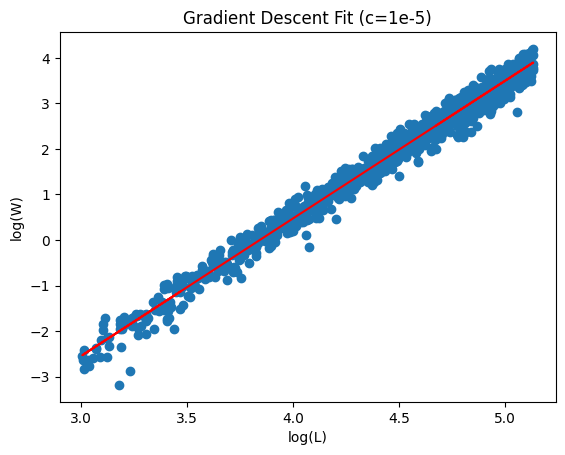

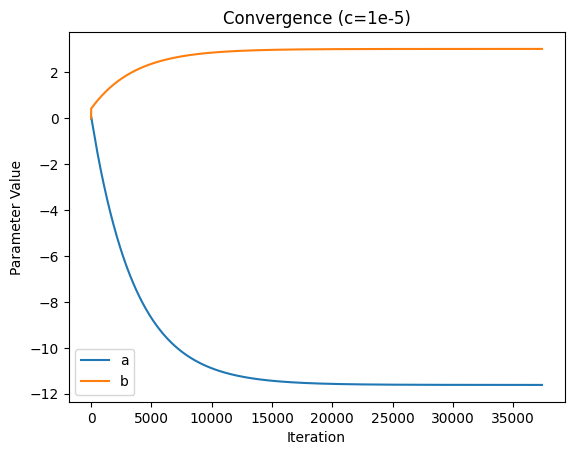

In [ ]:
'''
Define the step size, tolerance, init condition
The iteration is started from 0 and we track the value of a and b at each iteration
Gradient descent is implimented in the loop untill the value of a and b satisfy the tolerance condition
'''

c = 1e-5
eps = 1e-7
a = 0
b = 0

iter = 0
a_path = []
b_path = []

res = y - a - b*x
del_a = 2*c*np.sum(res)
del_b = 2*c*np.sum(x*res)

while np.abs(del_a) > eps or np.abs(del_b) > eps:
    a_path.append(a)
    b_path.append(b)
    
    a += del_a
    b += del_b
    
    iter += 1
    
    res = y - a - b*x
    del_a = 2*c*np.sum(res)
    del_b = 2*c*np.sum(x*res)
    
print(f"Iterations: {iter}")
print(f"a*: {a}, b*: {b}")

plt.scatter(x, y)
plt.plot(x, a + b*x, 'r-')
plt.xlabel('log(L)')
plt.ylabel('log(W)')
plt.title('Gradient Descent Fit (c=1e-5)')
plt.show()

plt.plot(a_path, label='a')
plt.plot(b_path, label='b')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Convergence (c=1e-5)')
plt.legend()
plt.show()

Since delta a and b satisfy the tolerence condition and terminate the gradient descent algorithm, it confirm the convergence into printed number and as shown on above plot

(c) Repeat (a) using $c=10^{-4}$. You should see an error. Plot $a$ and $b$ as a function of iteration number. What is going on? (15 pts)

Iterations: 609
a*: inf, b*: nan


/var/folders/x1/k24pyyhs04bb7784s3d75spr0000gn/T/ipykernel_33235/61049965.py:19: RuntimeWarning: invalid value encountered in scalar add
  b += del_b


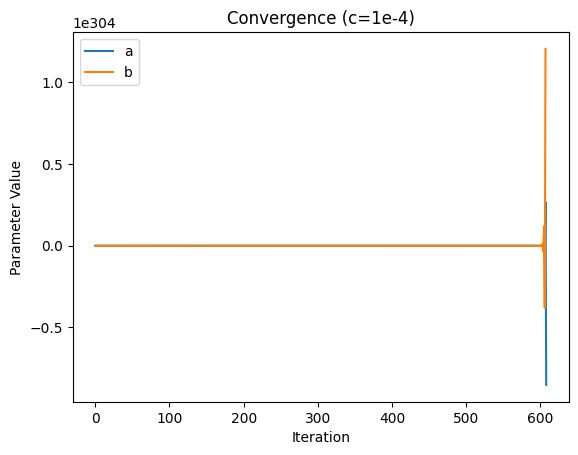

In [21]:
c = 1e-4
eps = 1e-7
a = 0
b = 0

iter = 0
a_path = []
b_path = []

res = y - a - b*x
del_a = 2*c*np.sum(res)
del_b = 2*c*np.sum(x*res)

while np.abs(del_a) > eps or np.abs(del_b) > eps:
    a_path.append(a)
    b_path.append(b)
    
    a += del_a
    b += del_b
    
    iter += 1
    
    res = y - a - b*x
    del_a = 2*c*np.sum(res)
    del_b = 2*c*np.sum(x*res)
    
print(f"Iterations: {iter}")
print(f"a*: {a}, b*: {b}")

plt.plot(a_path, label='a')
plt.plot(b_path, label='b')
plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Convergence (c=1e-4)')
plt.legend()
plt.show()

Obtained $a^*$ and $b^*$ diverge since given step size $c=10^{-4}$ is too large. Its because the gradient of the error functino make the larger gradient and this larger gradient make again the even larger error. This positive feedback of error is repeated untill the value be diverged.